In [1]:
import sys
# adiciona app
sys.path.append('../app')

In [2]:
from model_controller import ModelPredictController, ModelTrainController
from plotter import Plotter
from glob import glob
from IPython.display import Image
import config

Para parar o treinamento, criar o arquivo  C:\mestrado\repos-github\chess-attention\stop
Using default size mode:  {'input_shape': (800, 862), 'attention_shape': (50, 53), 'vgg_layer': -2}
Found GPU at: /device:GPU:0
2.5.0
Found GPU at: /device:GPU:0
2.5.0
Found GPU at: /device:GPU:0
Found GPU at: /device:GPU:0
2.5.0


In [3]:
model = ModelPredictController();

In [4]:
model.load()

building...
total do vocabulario=  179
VOCAB_SIZE 180
Shape da imagem ao final da CNN:  (None, 50, 53, 512)
LEARNING_RATE =  0.0005


In [5]:
model.restoreFromCheckpointName('train_20220407_icpr2022_70k_ref_10k_ref_2k_part2_1---8linhas-handwritten-only-2388_best --BEST-79_28--')


restore from pretraining  C:\mestrado\repos-github\chess-attention\train-folder/checkpoints/train_20220407_icpr2022_70k_ref_10k_ref_2k_part2_1---8linhas-handwritten-only-2388_best --BEST-79_28--\ckpt-113 ...


target_len=  16
evaluating dataset  test-8lines-one-easy
evaluating total images:  1 ...
evaluating  0 ...
--------------------<  0 :  carnaval_0227_fullpage.jpg >------------------------------
len: 16 acc: 1.0 cer 0.0 file:  C:\mestrado\repos-github\chess-attention/test-data/test-8lines-one-easy\images\carnaval_0227_fullpage.jpg


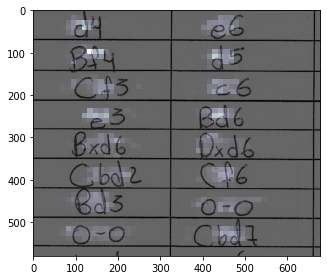

Expected:   d4 e6 Bf4 d5 Nf3 c6 e3 Bd6 Bxd6 Qxd6 Nbd2 Nf6 Bd3 O-O O-O Nbd7 
Predicted:  d4 e6 Bf4 d5 Nf3 c6 e3 Bd6 Bxd6 Qxd6 Nbd2 Nf6 Bd3 O-O O-O Nbd7 


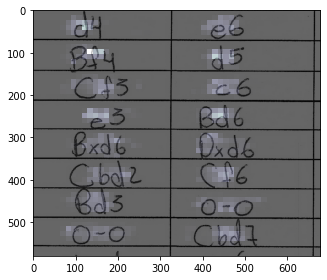

Expected:   d4 e6 Bf4 d5 Nf3 c6 e3 Bd6 Bxd6 Qxd6 Nbd2 Nf6 Bd3 O-O O-O Nbd7 
Predicted:  d4 e6 Bf4 d5 Nf3 c6 e3 Bd6 Bxd6 Qxd6 Nbd2 Nf6 Bd3 O-O O-O Nbd7 
C:\mestrado\repos-github\chess-attention/test-data/test-8lines-one-easy\images\carnaval_0227_fullpage.jpg


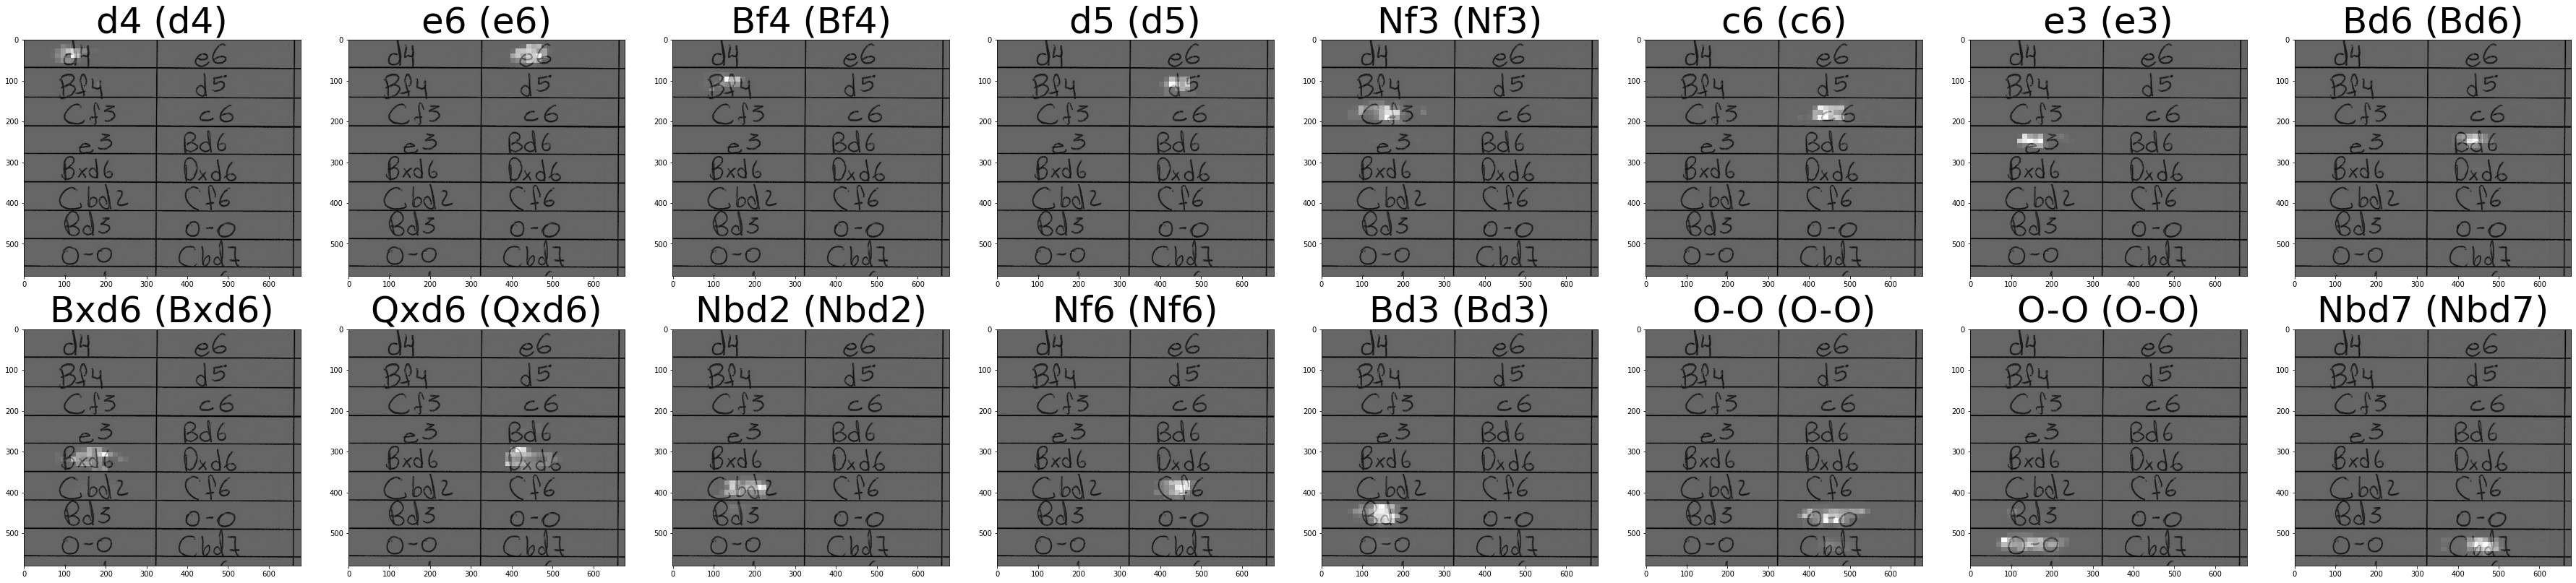

[([1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0],
  'test-8lines-one-easy')]

In [6]:
config.PLOT_UNIFIED = True
model.evaluateForTest('test-8lines-one-easy', plot_attention=True, _len= 16)

In [ ]:
def plot_attention_unified(image, result, attention_plot, expected=None):
    temp_image = np.array(Image.open(image))
    temp_att = np.resize(np.sum(attention_plot, axis=0), config.size_mode['attention_shape'])
    img = plt.imshow(temp_image)
    plt.imshow(temp_att, cmap='bone', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()
    if expected is not None:
        Plotter.print_result(expected, result)